In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import imageio
from pathlib import Path
from graph.load import load_graph
from eval.eval import model_struc_to_eval, get_real_feat, get_sim_feat, get_struc_df, get_cf_veh_pair, raw_struc_to_eval, compare_struc,model_feat_to_eval,model_struc_to_eval
import pandas as pd
import os
#import cv2
import pickle
import torch
from matplotlib.pyplot import figure
import math
import numpy as np
plt.style.use('default')
from sklearn.preprocessing import MinMaxScaler
import re
import numpy as np

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np
import re

ModuleNotFoundError: No module named 'torch'

### 1. Load data (real+sim)

In [ ]:
exp_dir = Path().resolve().parent / "experiment"
#exp_setting = exp_dir / "bologna_clean"
exp_setting = exp_dir / "traci_tls"
real_data_dir = exp_setting / "data" / "test5" / "test_data"
#out_dir = exp_setting / "data" / "test1" / "out_dim_50_n_heads_4_n_layer_2"
out_dir = exp_setting / "data" / "test5" / "out_dim_200_n_heads_4_n_layer_2"


#/nvme/wangding/Desktop/tsim/experiment/bologna_clean/data/test1/out_dim_50_n_heads_4_n_layer_2/predicted_graph_bologna_clean_test1_2_4_50.p
#/nvme/wangding/Desktop/tsim/experiment/traci_tls/data/test3/out_dim_200_n_heads_4_n_layer_2/predicted_graph_traci_tls_test3_2_4_200.p

#file_name = "predicted_graph_bologna_clean_test2_2_4_200.p"

file_name = "predicted_graph_traci_tls_test5_2_4_200.p"

: 

In [3]:
real_struc, real_feat, node_id_dict, scalers =  load_graph(real_data_dir)

In [4]:
real_feat['lane'][0]

{'length': tensor([1., 1., 1.,  ..., 1., 1., 1.]),
 'vehicles': tensor([0.0000, 0.0000, 0.0000,  ..., 0.8182, 0.8182, 0.8182]),
 'occupancy': tensor([0.0000, 0.0000, 0.0000,  ..., 0.1134, 0.1216, 0.1216]),
 'speed': tensor([0.8981, 0.8981, 0.8981,  ..., 0.4004, 0.4020, 0.4193]),
 'shape_a': tensor([0.0098, 0.0098, 0.0098,  ..., 0.0098, 0.0098, 0.0098]),
 'shape_b': tensor([0.4984, 0.4984, 0.4984,  ..., 0.4984, 0.4984, 0.4984]),
 'shape_c': tensor([0.4929, 0.4929, 0.4929,  ..., 0.4929, 0.4929, 0.4929]),
 'shape_d': tensor([0.4984, 0.4984, 0.4984,  ..., 0.4984, 0.4984, 0.4984]),
 'time': tensor([   1,    2,    3,  ..., 2018, 2019, 2020])}

In [5]:
min_len = scalers['lane'].data_min_[0]
min_occ = scalers['lane'].data_min_[1]
min_vol = scalers['lane'].data_min_[-1]

In [6]:
max_len = scalers['lane'].data_max_[0]
max_occ = scalers['lane'].data_max_[1]
max_vol = scalers['lane'].data_max_[-1]

In [7]:
7.39973773e-01

0.739973773

In [8]:
with open(out_dir / file_name, "rb") as g:
    model_graph = pickle.load(g)
unique_key = list(model_graph.keys())[0]
print(unique_key)
sim_struc, sim_feat = model_graph[unique_key]

full/0@2021.0


In [9]:
for node_type in sim_feat.keys():
    feat_type = sim_feat[node_type]
    #scaler = scalers[node_type]
    #min_values = scaler.data_min_
    #max_values = scaler.data_max_
    for node_id in feat_type.keys():
        feat_type_id = feat_type[node_id]
        for feat_name in feat_type_id.keys():
            if feat_name == 'time':
                x = feat_type_id[feat_name].squeeze()
                cumulative_sum = torch.zeros_like(x)
                prev_sum = 0
                for i in range(x.numel()):
                    prev_sum += x[i] 
                    cumulative_sum[i] = prev_sum if x[i] > 0 else 0
                feat_type_id[feat_name] = cumulative_sum
            else:
                feat_type_id[feat_name] = feat_type_id[feat_name].squeeze()
                #feat_type_id[feat_name] = (feat_type_id[feat_name] * (max_values - min_values)) + min_value
                

In [10]:
node_type = "veh"
node_id = 13
real_feat[node_type][node_id]['time']

tensor([ 56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164])

In [11]:
sim_feat[node_type][node_id]['time'].squeeze()


tensor([ 56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
         68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
         80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,
         92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103.,
        104., 105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
        116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126., 127.,
        128., 129., 130., 131., 132., 133., 134., 135., 136., 137., 138., 139.,
        140., 141., 142., 143., 144., 145., 146., 147., 148., 149., 150., 151.,
        152., 153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
        164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174., 175.,
        176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

### 2. Node feature comparison

In [84]:
def get_feat_df(feat_dict, node_type, node_id, feat):
    feat_lst = feat_dict[node_type][node_id][feat].tolist()
    time_lst = feat_dict[node_type][node_id]['time'].tolist() 
    #print(feat_lst)
    g_feat = pd.DataFrame(np.array([feat_lst, time_lst]).T)
    g_feat.columns = [feat+str(node_id), 'time']
    g_feat['time'] = [int(i) for i in g_feat.time]
    return g_feat

In [85]:
def plot_feat(real_feat,sim_feat,node_type,node_id,feat_name):
    feat_real = get_feat_df(real_feat, node_type, node_id, feat_name)
    feat_sim = get_feat_df(sim_feat, node_type, node_id, feat_name)
    feat_sim = feat_sim[feat_sim['time'] != 0]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4))
    ax.plot(feat_real['time'],feat_real[feat_name+str(node_id)], label = "real")
    ax.plot(feat_sim['time'],feat_sim[feat_name+str(node_id)], linestyle='--',  marker='o',
        markersize=2, label = "sim")
    ax.set_xlabel("steps")
    ax.set_ylabel(feat_name)
    ax.set_ylim(0,1)
    ax.set_title( feat_name+' of '+ node_type+'_'+str(node_id))
    ax.legend()

In [134]:
node_type = 'veh'
feat_name = 'speed'
node_id = 200
get_feat_df(sim_feat, node_type, node_id, feat_name)

,speed200,time
0,0.000000,982
1,0.030328,983
2,0.064281,984
3,0.090177,985
4,0.115771,986
...,...,...
163,0.000000,0
164,0.000000,0
165,0.000000,0
166,0.000000,0


In [142]:
node_type = 'veh'
feat_name = 'speed'
mae_sum = []
rmse_sum = []
last_car = list(real_feat['veh'].keys())[-1]
for node_id in list(real_feat['veh'].keys())[0:415]:
    #print(node_id)
    feat_real = get_feat_df(real_feat, node_type, node_id, feat_name)
    feat_sim = get_feat_df(sim_feat, node_type, node_id, feat_name)
    feat_sim = feat_sim[feat_sim['time'] != 0]
    
#     feat_real = feat_real[feat_real['time'] >450]
#     feat_sim = feat_sim[feat_sim['time'] >450]
    
    if feat_real.shape[0]>0:
        real = feat_real[feat_name+str(node_id)]
        sim = feat_sim[feat_name+str(node_id)][:len(real)]

        mae_sum.append(mean_absolute_error(real,sim))
        #print("MAE:", mae)

        # Calculate Root Mean Squared Error (RMSE)
        rmse_sum.append(np.sqrt(mean_squared_error(real,sim)))
        #print("RMSE:", rmse)

        # calculate R-squared
        r2 = r2_score(real, sim)

        # calculate MAPE
        mape = np.mean(np.abs((real - sim) / real)) * 100

In [143]:
print(np.mean(rmse_sum),np.mean(mae_sum),np.mean(r2),np.mean(mape))

0.005900745802925518 0.003348257600721512 0.47290038660094524 37.357349787958036


In [17]:
node_type = 'veh'
node_id = 200
feat_name = 'speed'
feat_real = get_feat_df(real_feat, node_type, node_id, feat_name)
feat_sim = get_feat_df(sim_feat, node_type, node_id, feat_name)
feat_sim = feat_sim[feat_sim['time'] != 0]

In [18]:
real = feat_real[feat_name+str(node_id)]
sim = feat_sim[feat_name+str(node_id)][:len(real)]

mae = mean_absolute_error(real,sim)
print("MAE:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(real,sim))
print("RMSE:", rmse)

MAE: 0.0
RMSE: 0.0


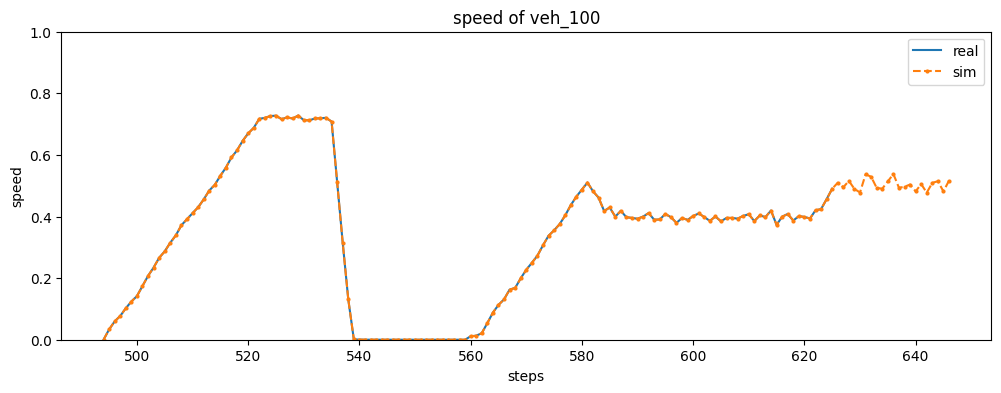

In [20]:
node_type = 'veh'
node_id = 100
feat_name = 'speed'

plot_feat(real_feat,sim_feat,node_type,node_id,feat_name)


In [ ]:
node_type = 'lane'
node_id = 1
feat_name = 'occupancy'

plot_feat(real_feat,sim_feat,node_type,node_id,feat_name)

### Fundamental Digram

In [61]:
real_feat['lane'].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

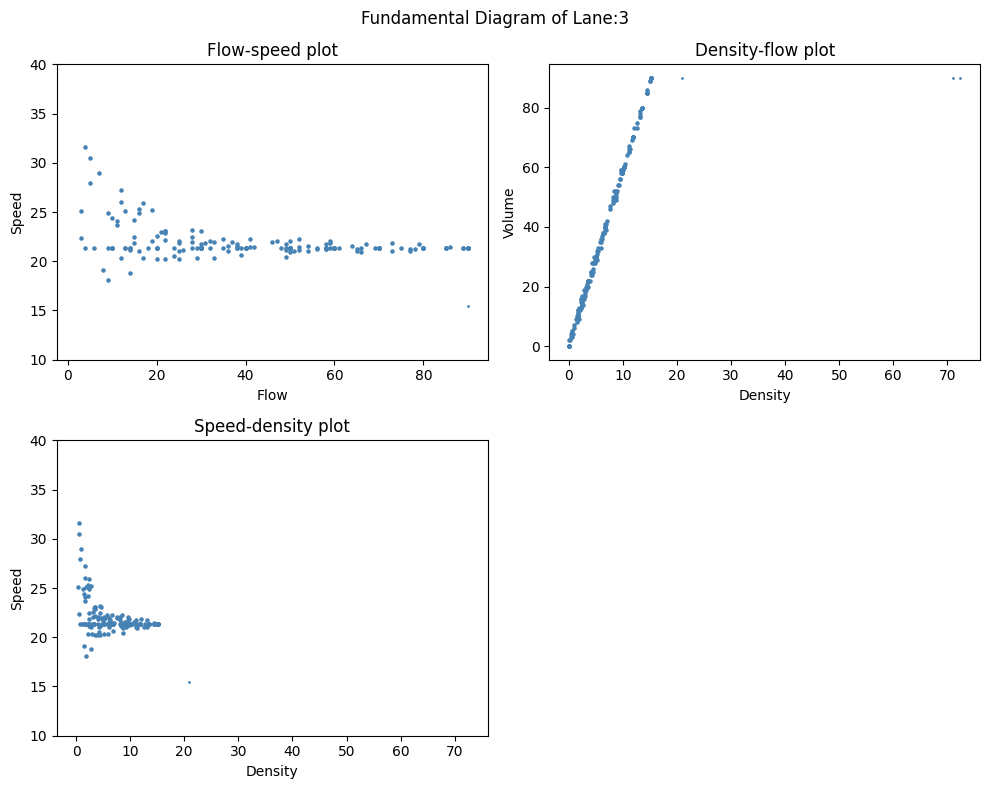

In [80]:
for node_id in range(3,4):
    node_type = "lane"
    feat_name1 = "occupancy"
    feat_name2 = "vehicles"

    lane_len = float(real_feat['lane'][node_id]['length'][0])*(max_len-min_len)+min_len
    feat_real1 = get_feat_df(real_feat, node_type, node_id, feat_name1)
    feat_real2 = get_feat_df(real_feat, node_type, node_id, feat_name2)
    df = pd.merge(feat_real1,feat_real2,on="time")
    occupancy_r = df[feat_name1+str(node_id)]
    occupancy_r = [sum(occupancy_r[i:i+10])/10 for i in range(0, len(occupancy_r), 10)]
    volume_r = df[feat_name2+str(node_id)]*(max_vol-min_vol)+min_vol
    volume_r = [sum(volume_r[i:i+10]) for i in range(0, len(volume_r), 10)]
    density_r = [x * lane_len/4 for x in occupancy_r]
    
    speed_r = []
    for ai, bi in zip(volume_r, density_r):
        if bi == 0:
            speed_r.append(float('nan'))
        else:
            speed_r.append(ai*3.6 / bi)
            
            
    feat_sim1 = get_feat_df(sim_feat, node_type, node_id, feat_name1)
    feat_sim2 = get_feat_df(sim_feat, node_type, node_id, feat_name2)
    df = pd.merge(feat_sim1,feat_sim2,on="time")
    occupancy_s = df[feat_name1+str(node_id)]
    occupancy_s = [sum(occupancy_s[i:i+10])/10 for i in range(0, len(occupancy_s), 10)]
    volume_s = df[feat_name2+str(node_id)]*(max_vol-min_vol)+min_vol
    volume_s = [sum(volume_s[i:i+10]) for i in range(0, len(volume_s), 10)]
    density_s = [x * lane_len/4 for x in occupancy_s]
    
    speed_s = []
    for ai, bi in zip(volume_s, density_s):
        if bi == 0:
            speed_s.append(float('nan'))
        else:
            speed_s.append(ai*3.6 / bi)
        
    
    # create a figure with three subplots
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
    size1 = 5
    
    size2 = 1
    color1 = "steelblue"
    color2 = "steelblue"
    # plot the data in the first subplot
    axs[0, 0].scatter(volume_r,speed_r,s=size1, c=color1,label='real')
    axs[0, 0].scatter(volume_s,speed_s,s=size2, c=color2,label='sim')
    axs[0, 0].set_title('Flow-speed plot')
    axs[0, 0].set_xlabel("Flow")
    axs[0, 0].set_ylabel("Speed")
    axs[0, 0].set_ylim(10,40)

    # plot the data in the second subplot
    axs[0, 1].scatter(density_r,volume_r,s=size1, c=color1,label='real')
    axs[0, 1].scatter(density_s,volume_s,s=size2, c=color2,label='sim')
    axs[0, 1].set_title('Density-flow plot')
    axs[0, 1].set_xlabel("Density")
    axs[0, 1].set_ylabel("Volume")
    

    # plot the data in the third subplot
    axs[1, 0].scatter(density_r,speed_r,s=size1, c=color1,label='real')
    axs[1, 0].scatter(density_s,speed_s,s=size2, c=color2,label='sim')
    axs[1, 0].set_title('Speed-density plot')
    axs[1, 0].set_xlabel("Density")
    axs[1, 0].set_ylabel("Speed")
    axs[1, 0].set_ylim(10,40)
    
    axs[1, 1].axis('off')
    # add a title to the entire figure
    fig.suptitle('Fundamental Diagram of Lane:'+str(node_id))

    # adjust the spacing between the subplots
    fig.tight_layout()
    #fig.legend()

    # show the plot
    plt.show()
    #plt.savefig(out_dir / "LANE_{s}.png".format(s=node_id), format="PNG",)



In [275]:
node_type = "lane"
node_id = 29
feat_name1 = "occupancy"
feat_name2 = "vehicles"

lane_len = float(real_feat['lane'][node_id]['length'][0])*(max_len-min_len)+min_len
feat_real1 = get_feat_df(real_feat, node_type, node_id, feat_name1)
feat_real2 = get_feat_df(real_feat, node_type, node_id, feat_name2)
df = pd.merge(feat_real1,feat_real2,on="time")
occupancy = df[feat_name1+str(node_id)]
occupancy = [sum(occupancy[i:i+10])/10 for i in range(0, len(occupancy), 10)]
volume = df[feat_name2+str(node_id)]*(max_vol-min_vol)+min_vol
volume = [sum(volume[i:i+10]) for i in range(0, len(volume), 10)]
density = [x * lane_len/7 for x in occupancy]

speed = []
for ai, bi in zip(volume, density):
    if bi == 0:
        speed.append(float('nan'))
    else:
        speed.append(ai*3.6 / bi)
        
        
# plt.scatter(volume,speed)
# plt.scatter(density,volume)
# plt.scatter(density,speed)

# plt.xlabel("Occupancy")
# plt.ylabel("Volume")
# #plt.title(feat_name.capitalize() + " of vehicle pairs")
# plt.legend(fontsize=10)
# plt.show()

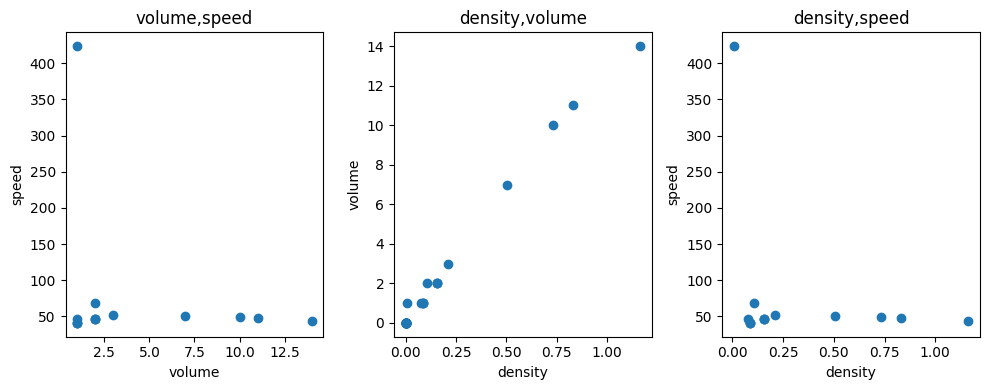

In [276]:
# create a figure with three subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# plot the data in the first subplot
axs[0].scatter(volume,speed)
axs[0].set_title('volume,speed')
axs[0].set_xlabel("volume")
axs[0].set_ylabel("speed")
# axs[0].set_ylim(0,20)

# plot the data in the second subplot
axs[1].scatter(density,volume)
axs[1].set_title('density,volume')
axs[1].set_xlabel("density")
axs[1].set_ylabel("volume")

# plot the data in the third subplot
axs[2].scatter(density,speed)
axs[2].set_title('density,speed')
axs[2].set_xlabel("density")
axs[2].set_ylabel("speed")

# add a title to the entire figure
#fig.suptitle('Trigonometric Functions')

# adjust the spacing between the subplots
fig.tight_layout()

# show the plot
plt.show()






In [ ]:
for node_id in list(real_feat[node_type].keys()):
    df_real_feat1[feat_name1+str(node_id)] = get_feat_df(real_feat, node_type, node_id, feat_name1)[feat_name1+str(node_id)]
    df_sim_feat1[feat_name1+str(node_id)] = get_feat_df(sim_feat, node_type, node_id, feat_name1)[feat_name1+str(node_id)]

In [314]:
node_type = "lane"
node_id = 0
feat_name1 = "occupancy"
feat_name2 = "vehicles"

feat_lst_real1 = []
feat_lst_real2 = []
feat_lst_sim1 = []
feat_lst_sim2 = []
avg_feat_real = pd.DataFrame()
avg_feat_sim = pd.DataFrame()

df_real_feat1 = pd.DataFrame()
df_sim_feat1 = pd.DataFrame()
for node_id in list(real_feat[node_type].keys()):
    df_real_feat1[feat_name1+str(node_id)] = get_feat_df(real_feat, node_type, node_id, feat_name1)[feat_name1+str(node_id)]
    df_sim_feat1[feat_name1+str(node_id)] = get_feat_df(sim_feat, node_type, node_id, feat_name1)[feat_name1+str(node_id)]
    df_real_feat2[feat_name2+str(node_id)] = get_feat_df(real_feat, node_type, node_id, feat_name2)[feat_name2+str(node_id)]
    df_sim_feat2[feat_name2+str(node_id)] = get_feat_df(sim_feat, node_type, node_id, feat_name2)[feat_name2+str(node_id)]

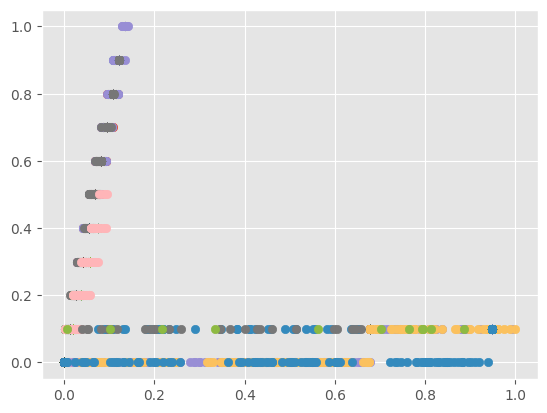

In [324]:
for node_id in list(real_feat[node_type].keys()):
    plt.scatter(df_real_feat1[feat_name1+str(node_id)],df_real_feat2[feat_name2+str(node_id)])

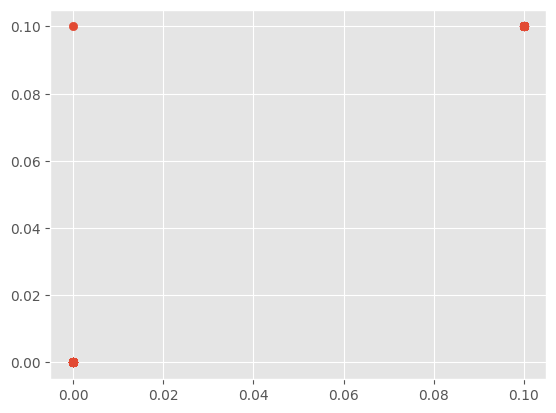

In [320]:
plt.scatter(df_real_feat2[feat_name2+str(node_id)],df_sim_feat2[feat_name2+str(node_id)])

In [316]:
df_sim_feat1

,occupancy0,occupancy1,occupancy2,occupancy3,occupancy4,occupancy5,occupancy6,occupancy7,occupancy8,occupancy9,occupancy10,occupancy11,occupancy12,occupancy13,occupancy14,occupancy15
0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.677739,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.677739,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.677739,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.677739,0.000000,0.677739,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
4,0.000000,0.000000,0.001033,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.677739,0.000000,0.626087,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0.039357,0.003499,0.033349,0.023983,5.893180e-07,0.006291,0.112556,0.000503,0.016838,0.031202,0.005961,0.295133,7.548498e-02,1.117455e-05,2.292771e-06,0.178119
1016,0.059539,0.009739,0.052667,0.009624,4.097292e-05,0.001175,0.014481,0.003667,0.006048,0.174589,0.016284,0.284773,8.026004e-07,4.094341e-07,2.887430e-05,0.064530
1017,0.061812,0.002377,0.019982,0.012458,3.554692e-05,0.003226,0.012186,0.004135,0.032421,0.171253,0.002812,0.171396,1.715524e-07,1.974949e-04,3.623444e-07,0.108514
1018,0.074516,0.016524,0.023189,0.052206,1.577825e-06,0.001872,0.013176,0.004495,0.030054,0.114557,0.006514,0.104901,2.744351e-03,3.129343e-04,4.547396e-08,0.061414


(array([[2.60e+01, 0.00e+00, 6.40e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [1.15e+02, 1.50e+01, 7.40e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [8.00e+00, 4.00e+00, 1.70e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        ...,
        [1.02e+03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [1.02e+03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [8.05e+02, 1.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]]),
 array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
        0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
        0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
        0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
        0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
        0.315, 0.32 , 0.325, 0.33 , 0.

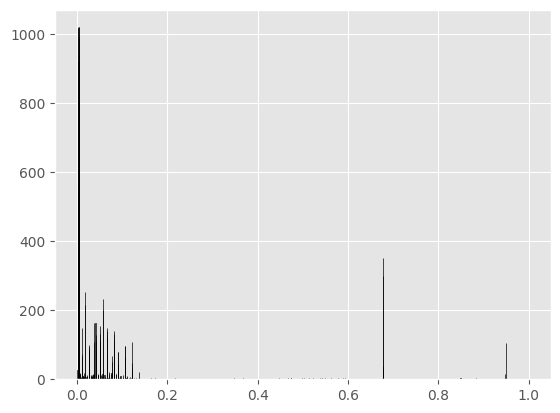

In [317]:
# plt.plot(df_real_feat1.mean(axis=1))
# plt.plot(df_sim_feat1.mean(axis=1))

plt.hist(df_sim_feat1,bins=200, alpha=1,edgecolor='black',facecolor='none',label='TransWorld')

In [304]:
node_type = "lane"
node_id = 0
feat_name1 = "occupancy"
feat_name2 = "vehicles"

feat_lst_real1 = []
feat_lst_real2 = []
feat_lst_sim1 = []
feat_lst_sim2 = []
avg_feat_real = pd.DataFrame()
avg_feat_sim = pd.DataFrame()
for node_id in list(real_feat[node_type].keys()):
    df_real_feat1 = get_feat_df(real_feat, node_type, node_id, feat_name1) 
    df_sim_feat1 = get_feat_df(sim_feat, node_type, node_id, feat_name1)
    df_real_feat2 = get_feat_df(real_feat, node_type, node_id, feat_name2) 
    df_sim_feat2 = get_feat_df(sim_feat, node_type, node_id, feat_name2)
    
    feat_lst_real1.append(df_real_feat1[feat_name1+str(node_id)])
    feat_lst_real2.append(df_real_feat2[feat_name2+str(node_id)])
    feat_lst_sim1.append(df_sim_feat1[feat_name1+str(node_id)])
    feat_lst_sim2.append(df_sim_feat2[feat_name2+str(node_id)])

df_feat1_real = pd.DataFrame(np.array(feat_lst_real1))
df_feat1_sim = pd.DataFrame(np.array(feat_lst_sim1))
df_feat2_real = pd.DataFrame(np.array(feat_lst_real2))
df_feat2_sim = pd.DataFrame(np.array(feat_lst_sim2))

# df_feat1_real
df_real = pd.merge(df_feat1_real,df_feat2_real,on="time")
df_sim = pd.merge(df_feat1_sim,df_feat2_sim,on="time")

# feat_real_avg1 = df_feat1_real.mean()
# feat_real_avg2 = df_feat2_real.mean()
# feat_sim_avg1 = df_feat1_sim.mean()
# feat_sim_avg2 = df_feat2_sim.mean()

# time_real =  df_real['time']
# time_sim =  df_sim['time']

# avg_feat_real['time'] = time_real
# avg_feat_sim['time'] = time_sim
# avg_feat_real[feat_name+'_avg'] = feat_real_avg
# avg_feat_sim[feat_name+'_avg'] = feat_sim_avg

# plt.plot(df_real[feat_name], feat_real_avg1, label = "real")
# plt.plot(feat_sim_avg2, feat_sim_avg1, label = "sim")

# # plt.xlabel("Time step")
# # plt.ylabel(feat_name)
# plt.title("Citywide_avg_"+ node_type + "_" + feat_name)
# plt.legend()
# plt.show()

KeyError: 'time'

### 3. Car following behavior

In [33]:
def get_cf_df(struc_dict):
    front_veh = struc_dict[('veh', 'phy/ahead', 'veh')][0].tolist()
    behind_veh = struc_dict[('veh', 'phy/ahead', 'veh')][1].tolist()
    time = struc_dict[('veh', 'phy/ahead', 'veh')][2].tolist()
    cf_struc = pd.DataFrame(np.array([front_veh, behind_veh,time]).T)
    cf_struc.columns = ['front_veh', 'behind_veh', 'time']
    return cf_struc

def CF_plot(real_feat_dict,sim_feat_dict,front_veh_id,behind_veh_id,feat_name,plot_cf):
    cf_struc = get_cf_df(real_struc)
    veh_pair = cf_struc[(cf_struc['front_veh'] == front_veh_id) & (cf_struc['behind_veh'] == behind_veh_id)]

    feat_front = get_feat_df(real_feat_dict, 'veh', front_veh_id, feat_name)
    feat_behind = get_feat_df(real_feat_dict, 'veh', behind_veh_id, feat_name)
    feat_front_sim = get_feat_df(sim_feat_dict, 'veh', front_veh_id, feat_name)
    feat_behind_sim = get_feat_df(sim_feat_dict, 'veh', behind_veh_id,feat_name)

    merge_front = pd.merge(veh_pair, feat_front, on='time')
    merge_behind = pd.merge(merge_front, feat_behind, on='time')
    merge_front_sim = pd.merge(veh_pair, feat_front_sim, on='time')
    merge_behind_sim = pd.merge(merge_front_sim, feat_behind_sim, on='time')
    
    if plot_cf == 1:
        plt.plot(merge_behind['time'], merge_behind[feat_name+str(front_veh_id)], label = "Front_car")
        plt.plot(merge_behind['time'], merge_behind[feat_name+str(behind_veh_id)], label = "Follower_car")
        plt.plot(merge_behind_sim['time'], merge_behind_sim[feat_name+str(front_veh_id)], linestyle='--',  marker='o', markersize=2, label = "Front_car_sim")
        plt.plot(merge_behind_sim['time'],merge_behind_sim[feat_name+str(behind_veh_id)], linestyle='--',  marker='o',
            markerfacecolor='blue', markersize=2, label = "Follower_car_sim")
        plt.xlabel("Time step")
        plt.ylabel(feat_name.capitalize())
        plt.title(feat_name.capitalize() + " of vehicle pairs")
        plt.legend(fontsize=10)
        plt.show()
    else:
        return merge_behind_sim

In [34]:
cf_struc = get_cf_df(real_struc)
df = cf_struc[['front_veh','behind_veh']].drop_duplicates()
all_veh_pairs = list(set([(i,j) for i in df['front_veh'] for j in df['behind_veh']]))

In [35]:
long_cf_pairs = []
for pair in all_veh_pairs:
    front_veh_id, behind_veh_id = pair
    veh_pair = cf_struc[(cf_struc['front_veh'] == front_veh_id) & (cf_struc['behind_veh'] == behind_veh_id)]
    pair_time = len(set(veh_pair.time))
    if pair_time>50: 
        # print(min(veh_pair['time']))
        if max(veh_pair['time'])>100:
            long_cf_pairs.append((front_veh_id, behind_veh_id, pair_time))

In [36]:
long_cf_pairs

[(208, 210, 117),
 (189, 192, 117),
 (25, 29, 106),
 (286, 288, 120),
 (134, 135, 96),
 (234, 236, 122),
 (312, 314, 92),
 (397, 399, 95),
 (372, 373, 112),
 (168, 169, 122),
 (4, 6, 71),
 (104, 107, 102),
 (116, 117, 110),
 (238, 241, 57),
 (79, 81, 120),
 (242, 244, 118),
 (37, 40, 131),
 (371, 374, 109),
 (398, 400, 95),
 (246, 247, 106),
 (346, 348, 128),
 (112, 115, 114),
 (68, 69, 119),
 (290, 294, 107),
 (138, 141, 117),
 (13, 14, 102),
 (350, 351, 129),
 (316, 320, 88),
 (294, 297, 102),
 (117, 118, 98),
 (123, 126, 112),
 (220, 222, 125),
 (101, 103, 122),
 (98, 100, 131),
 (195, 196, 105),
 (393, 398, 100),
 (323, 328, 71),
 (64, 67, 88),
 (358, 359, 113),
 (321, 323, 114),
 (272, 274, 126),
 (150, 152, 100),
 (347, 349, 100),
 (201, 204, 126),
 (176, 178, 107),
 (154, 155, 131),
 (205, 207, 127),
 (354, 357, 124),
 (223, 228, 87),
 (310, 311, 104),
 (383, 386, 102),
 (258, 259, 136),
 (51, 52, 94),
 (127, 130, 114),
 (102, 104, 113),
 (214, 215, 94),
 (390, 394, 108),
 (265,

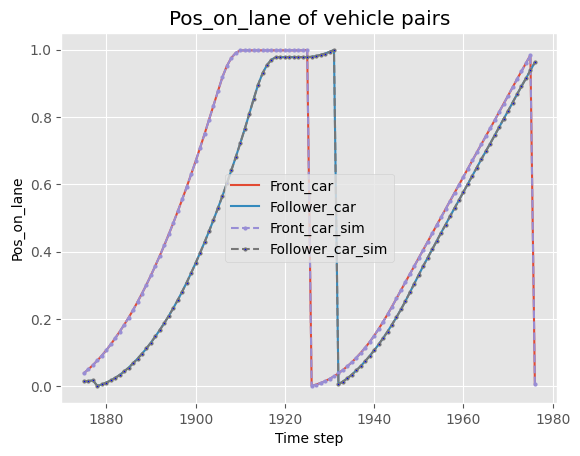

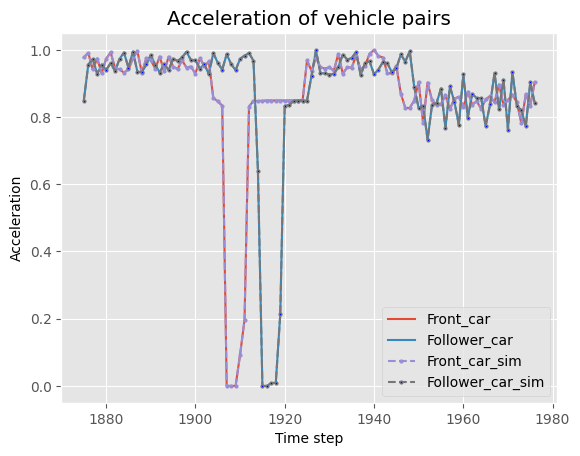

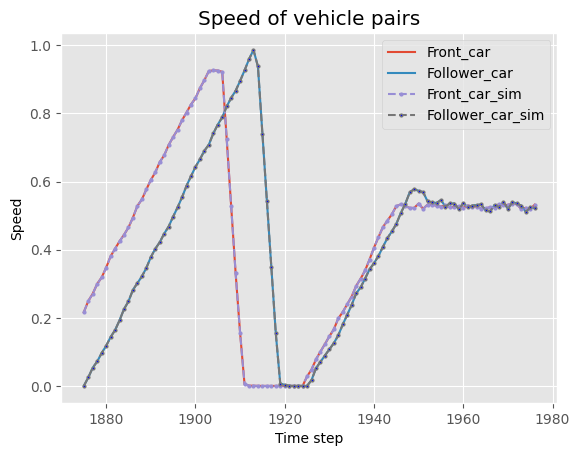

In [39]:
front_veh_id = 383
behind_veh_id = 386

CF_plot(real_feat,sim_feat,front_veh_id,behind_veh_id,'pos_on_lane',1)
CF_plot(real_feat,sim_feat,front_veh_id,behind_veh_id,"acceleration",1)
CF_plot(real_feat,sim_feat,front_veh_id,behind_veh_id,"speed",1)


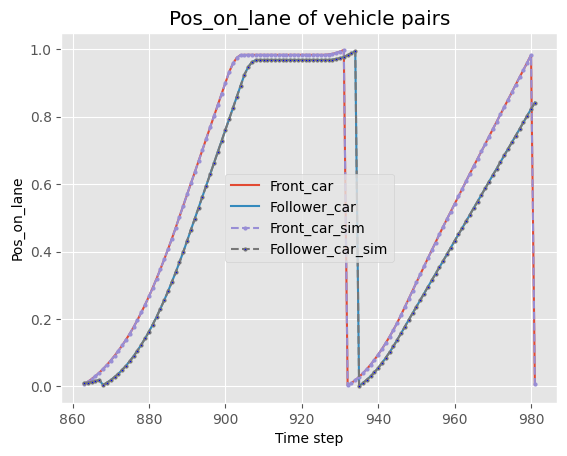

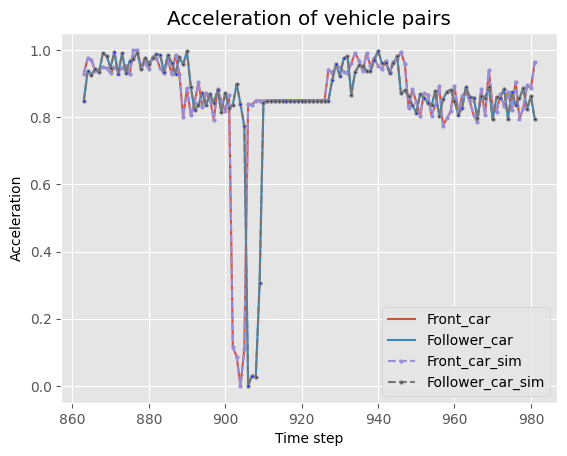

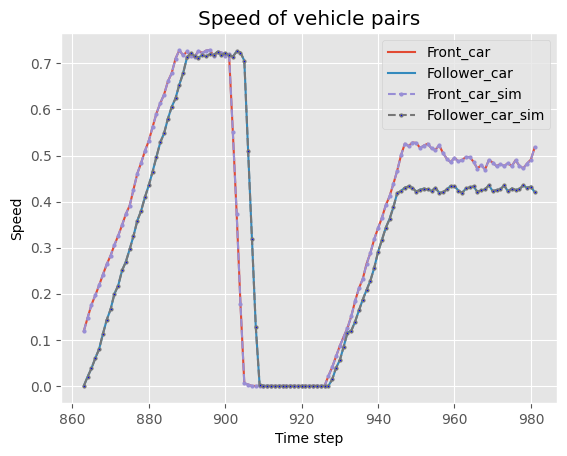

In [37]:
front_veh_id = 170
behind_veh_id = 172

CF_plot(real_feat,sim_feat,front_veh_id,behind_veh_id,'pos_on_lane',1)
CF_plot(real_feat,sim_feat,front_veh_id,behind_veh_id,"acceleration",1)
CF_plot(real_feat,sim_feat,front_veh_id,behind_veh_id,"speed",1)


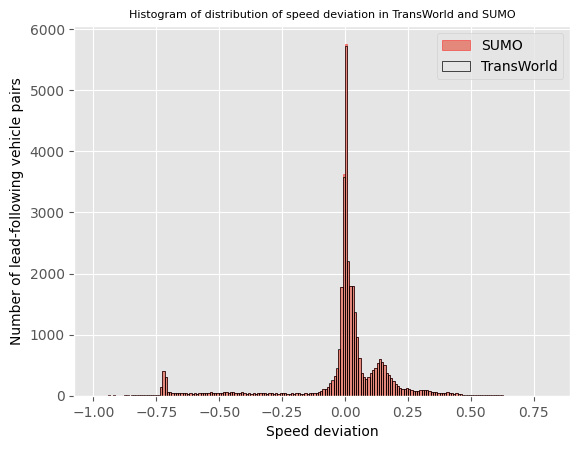

In [38]:


speed_dev = []
speed_dev_sim = []
node_type = 'veh' 
feat_name = 'speed'

for pair in long_cf_pairs:
    front_veh_id = pair[0]
    behind_veh_id = pair[1] 
    veh_pair = get_cf_veh_pair(cf_struc, front_veh_id, behind_veh_id)
    speed_front,speed_behind = get_feat_df(real_feat, node_type, front_veh_id, feat_name),get_feat_df(real_feat, node_type, behind_veh_id,feat_name)
    speed_front_sim, speed_behind_sim = get_feat_df(sim_feat, node_type, front_veh_id, feat_name), get_feat_df(sim_feat, node_type, behind_veh_id,feat_name)
    
    merge_front = pd.merge(veh_pair, speed_front, on='time')
    merge_behind = pd.merge(merge_front, speed_behind, on='time')
    merge_front_sim = pd.merge(veh_pair, speed_front_sim, on='time')
    merge_behind_sim = pd.merge(merge_front_sim, speed_behind_sim, on='time')

    speed_dev.extend(merge_behind['speed'+str(front_veh_id)] - merge_behind['speed'+str(behind_veh_id)])
    speed_dev_sim.extend(merge_behind_sim['speed'+str(front_veh_id)] - merge_behind_sim['speed'+str(behind_veh_id)])
    

kwargs = dict(alpha=0.6, bins=200)

plt.hist(speed_dev, **kwargs, edgecolor='red', label='SUMO')
plt.hist(speed_dev_sim,bins=200, alpha=1,edgecolor='black',facecolor='none',label='TransWorld')
plt.xlabel("Speed deviation")
plt.ylabel("Number of lead-following vehicle pairs")
plt.title("Histogram of distribution of speed deviation in TransWorld and SUMO", fontsize=8)

plt.legend()
plt.show()

### fundamental diagram

In [175]:
real_feat['lane']

defaultdict(dict,
            {0: {'length': tensor([1., 1., 1.,  ..., 1., 1., 1.]),
              'vehicles': tensor([0.0000, 0.0000, 0.0000,  ..., 0.8182, 0.8182, 0.8182]),
              'occupancy': tensor([0.0000, 0.0000, 0.0000,  ..., 0.1134, 0.1216, 0.1216]),
              'speed': tensor([0.8981, 0.8981, 0.8981,  ..., 0.4004, 0.4020, 0.4193]),
              'shape_a': tensor([0.0098, 0.0098, 0.0098,  ..., 0.0098, 0.0098, 0.0098]),
              'shape_b': tensor([0.4984, 0.4984, 0.4984,  ..., 0.4984, 0.4984, 0.4984]),
              'shape_c': tensor([0.4929, 0.4929, 0.4929,  ..., 0.4929, 0.4929, 0.4929]),
              'shape_d': tensor([0.4984, 0.4984, 0.4984,  ..., 0.4984, 0.4984, 0.4984]),
              'time': tensor([   1,    2,    3,  ..., 2018, 2019, 2020])},
             1: {'length': tensor([1., 1., 1.,  ..., 1., 1., 1.]),
              'vehicles': tensor([0.0000, 0.0000, 0.0000,  ..., 0.5455, 0.5455, 0.4545]),
              'occupancy': tensor([0.0000, 0.0000, 0.0000, 

In [19]:
# node_type = "lane"
# node_id = 0
# feat_name1 = "occupancy"
# feat_name2 = "vehicles"

# feat_lst_real1 = []
# feat_lst_real2 = []
# feat_lst_sim1 = []
# feat_lst_sim2 = []
# avg_feat_real = pd.DataFrame()
# avg_feat_sim = pd.DataFrame()
# for node_id in list(real_feat[node_type].keys()):
#     df_real_feat1 = get_feat_df(real_feat, node_type, node_id, feat_name1) 
#     df_sim_feat1 = get_feat_df(sim_feat, node_type, node_id, feat_name1)
#     df_real_feat2 = get_feat_df(real_feat, node_type, node_id, feat_name2) 
#     df_sim_feat2 = get_feat_df(sim_feat, node_type, node_id, feat_name2)
    
#     feat_lst_real1.append(df_real_feat1[feat_name1+str(node_id)])
#     feat_lst_real2.append(df_real_feat2[feat_name2+str(node_id)])
#     feat_lst_sim1.append(df_sim_feat1[feat_name1+str(node_id)])
#     feat_lst_sim2.append(df_sim_feat2[feat_name2+str(node_id)])

# df_feat1_real = pd.DataFrame(np.array(feat_lst_real1))
# df_feat1_sim = pd.DataFrame(np.array(feat_lst_sim1))
# df_feat2_real = pd.DataFrame(np.array(feat_lst_real2))
# df_feat2_sim = pd.DataFrame(np.array(feat_lst_sim2))

# # df_feat1_real
# df_real = pd.merge(df_feat1_real,df_feat2_real,on="time")
# df_sim = pd.merge(df_feat1_sim,df_feat2_sim,on="time")


In [20]:

# g_struc = get_struc_df(real_struc)
# npairs = list(set(zip(g_struc['front_veh'], g_struc['behind_veh'])))

# speed_dev = []
# speed_dev_sim = []

# for pair in all_pairs:
#     front_veh_id = pair[0]
#     behind_veh_id = pair[1] 
#     veh_pair = get_cf_veh_pair(g_struc, front_veh_id, behind_veh_id)
#     speed_front = get_real_feat(real_feat, 'veh', front_veh_id, 'speed')
#     speed_behind = get_real_feat(real_feat, 'veh', behind_veh_id, 'speed')
    
#     speed_front_sim = get_sim_feat(model_graph, 'veh', front_veh_id, 'speed')
#     speed_behind_sim = get_sim_feat(model_graph, 'veh', behind_veh_id,'speed')    
    
#     merge_front = pd.merge(veh_pair, speed_front, on='time')
#     merge_behind = pd.merge(merge_front, speed_behind, on='time')
#     merge_front_sim = pd.merge(veh_pair, speed_front_sim, on='time')
#     merge_behind_sim = pd.merge(merge_front_sim, speed_behind_sim, on='time')

#     speed_dev.extend(merge_behind['speed'+str(front_veh_id)] - merge_behind['speed'+str(behind_veh_id)])
#     speed_dev_sim.extend(merge_behind_sim['speed'+str(front_veh_id)] - merge_behind_sim['speed'+str(behind_veh_id)])
    

# kwargs = dict(alpha=0.5, bins=80)

# plt.hist(speed_dev, **kwargs, color='g', label='Real')
# plt.hist(speed_dev_sim, **kwargs, color='b', label='sim')
# plt.xlabel("Speed deviation")
# plt.ylabel("Vehicle pairs")
# plt.title("Speed deviation of vehicle pairs")

# plt.legend()
# plt.show()

### 4. structure comparison

In [40]:
from typing import Dict, List, Optional, Tuple
def raw_struc_to_eval(struc_dict: Dict)-> pd.DataFrame:
    row = []
    for key, values in struc_dict.items():
        sr_type, rela, end_type = key
        sr_node, end_node, time = values
        for i in range(len(time)):
            row.append([sr_type, rela, end_type,int(sr_node[i]),int(end_node[i]),int(time[i])])
    raw_df = pd.DataFrame(row, columns=['sr_type', 'rela', 'end_type','sr_node','end_node','step'])
    raw_df["from"] = [raw_df["sr_type"][i] + str(raw_df["sr_node"][i]) for i in range(len(raw_df["sr_node"]))]
    raw_df["to"] = [raw_df["end_type"][i] + str(raw_df["end_node"][i]) for i in range(len(raw_df["end_node"]))]
    raw_df = raw_df[["step","from","to", 'rela']]
    return raw_df   

In [41]:
real_struc_df = raw_struc_to_eval(real_struc)
sim_struc_df = raw_struc_to_eval(sim_struc)

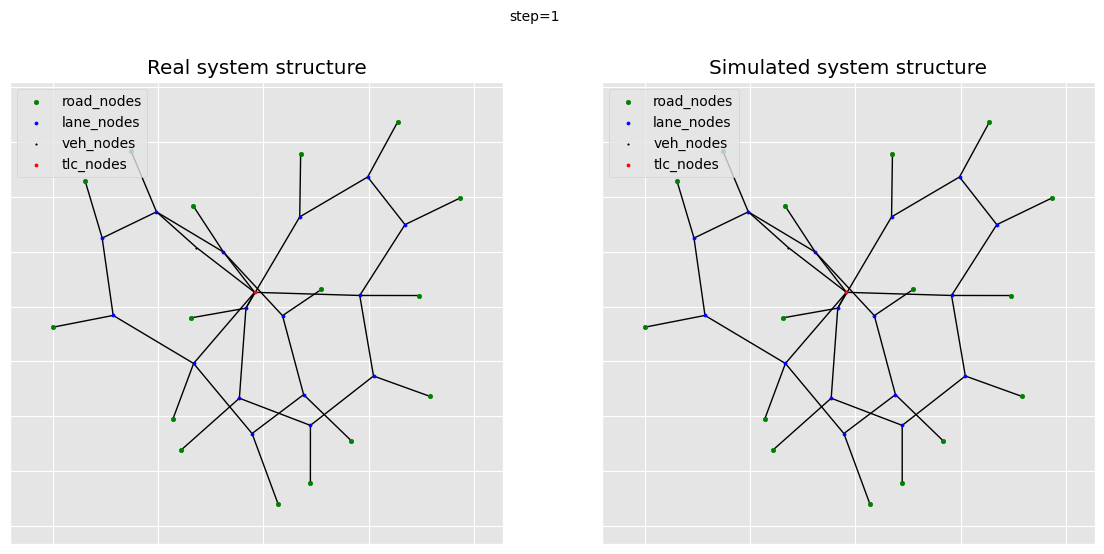

In [42]:
t = 1
sub_real = real_struc_df[real_struc_df["step"] == t]
sub_sim = sim_struc_df[sim_struc_df["step"] == t]
real_G = nx.from_pandas_edgelist(sub_real, 'from', 'to')
sim_G = nx.from_pandas_edgelist(sub_sim, 'from', 'to')


lane_nodes = [i for i in list(real_G.nodes) if 'lane' in i]
veh_nodes = [i for i in list(real_G.nodes) if 'veh' in i]
road_nodes = [i for i in list(real_G.nodes) if 'road' in i]
tlc_nodes = [i for i in list(real_G.nodes) if 'tlc' in i]

lane_nodes1 = [i for i in list(sim_G.nodes) if 'lane' in i]
veh_nodes1 = [i for i in list(sim_G.nodes) if 'veh' in i]
road_nodes1 = [i for i in list(sim_G.nodes) if 'road' in i]
tlc_nodes1 = [i for i in list(sim_G.nodes) if 'tlc' in i]


fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
plt.figtext(0.5, 1, "step={s}".format(s=t), ha='center', va='top')

pos = nx.fruchterman_reingold_layout(real_G)
#pos = nx.spring_layout(real_G)
#pos = nx.circular_layout(real_G)
nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=road_nodes, pos=pos, node_color = 'green', node_size = 10,label='road_nodes')
nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=lane_nodes, pos=pos, node_color = 'blue', node_size = 5,label='lane_nodes')
nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=veh_nodes, pos=pos, node_color = 'black' , node_size = 1, label='veh_nodes')
nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=tlc_nodes, pos=pos, node_color = 'red' , node_size = 5, label='tlc_nodes')

nx.draw_networkx_edges(real_G, ax=axs[0], pos=pos)
#nx.draw_networkx(real_G, ax=axs[0],  nodelist=rednodes, pos=pos, node_color = node_color, with_labels=False)
axs[0].title.set_text('Real system structure')
axs[0].legend(loc="upper left")


nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=road_nodes, pos=pos, node_color = 'green', node_size = 10,label='road_nodes')
nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=lane_nodes, pos=pos, node_color = 'blue', node_size = 5,label='lane_nodes')
nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=veh_nodes, pos=pos, node_color = 'black' , node_size = 1, label='veh_nodes')
nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=tlc_nodes, pos=pos, node_color = 'red' , node_size = 5, label='tlc_nodes')

nx.draw_networkx_edges(sim_G, ax=axs[1], pos=pos)

axs[1].title.set_text('Simulated system structure')
axs[1].legend(loc="upper left")

plt.show()

#plt.savefig(out_dir / "step_{s}.png".format(s=t), format="PNG",)
#plt.close()

In [49]:
real_struc_df[(real_struc_df["from"]== 'veh1')]

,step,from,to,rela
64643,4,veh1,lane9,phy/to
64646,5,veh1,lane9,phy/to
64648,6,veh1,lane9,phy/to
64651,7,veh1,lane9,phy/to
64653,8,veh1,lane0,phy/to
...,...,...,...,...
332670,89,veh1,veh3,phy/ahead
332686,90,veh1,veh3,phy/ahead
332701,91,veh1,veh3,phy/ahead
332716,92,veh1,veh3,phy/ahead


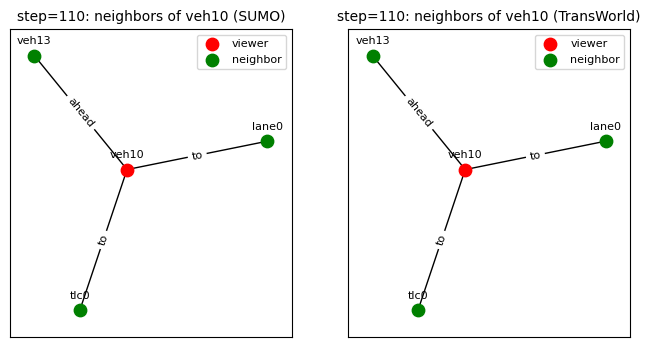

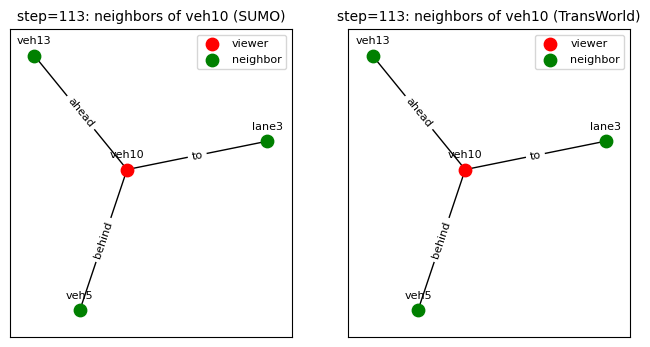

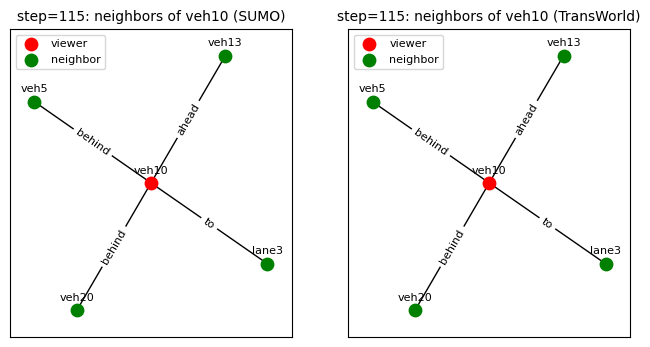

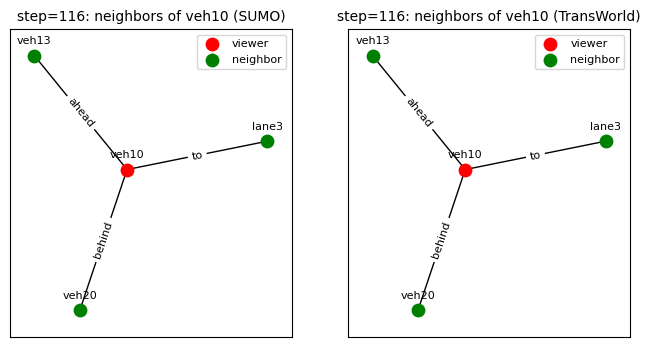

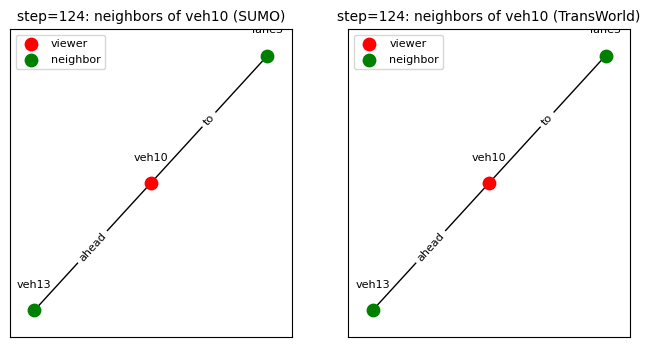

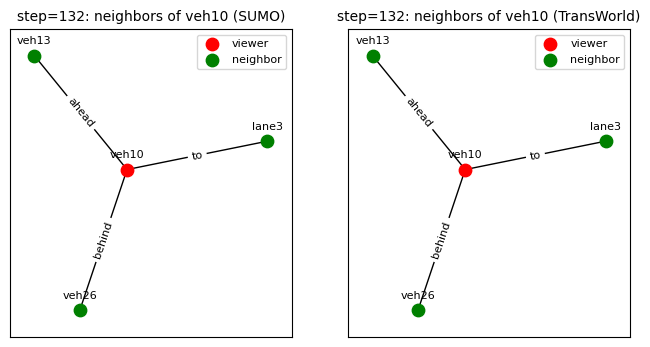

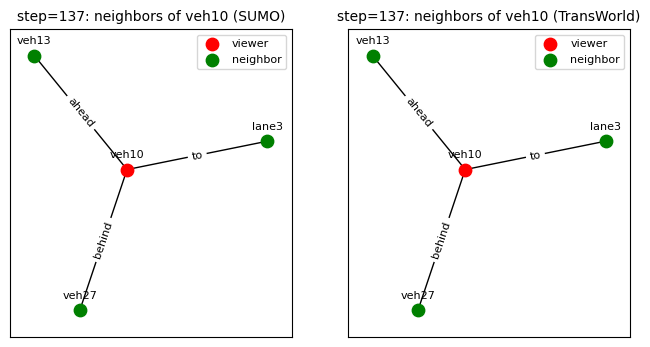

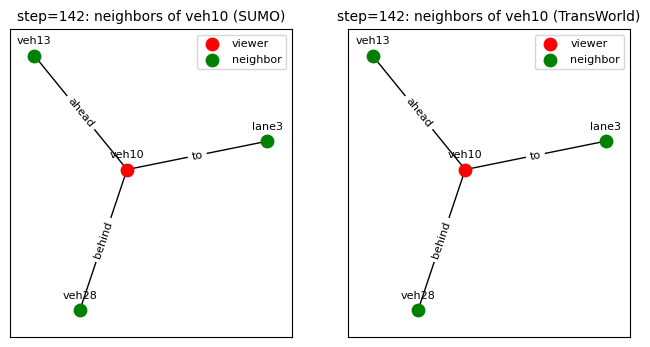

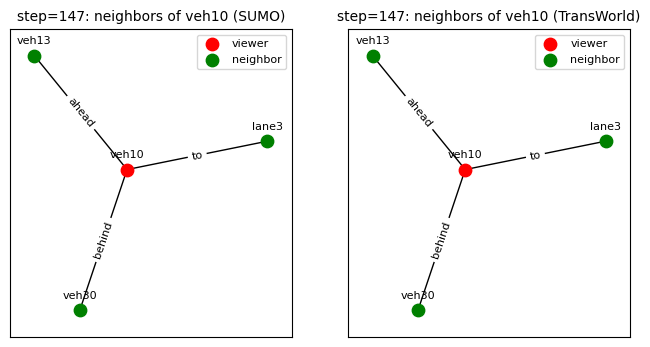

In [173]:
root = "veh10"
saved_neighbor = []

# sub_real = real_struc[(real_struc["step"] == t) & (real_struc["from"]== root)]
# real_G = nx.from_pandas_edgelist(sub_real, 'from', 'to')
# print(list(real_G.nodes))

# sub_sim = sim_struc[(sim_struc["step"] == t) & (sim_struc["from"]== root)]
# sim_G = nx.from_pandas_edgelist(sub_sim, 'from', 'to')

for t in range(110,150):
    sub_real = real_struc_df[(real_struc_df["step"] == t) & (real_struc_df["from"]== root)]
    sub_sim = sim_struc_df[(sim_struc_df["step"] == t) & (sim_struc_df["from"]== root)]
    real_G = nx.from_pandas_edgelist(sub_real, source='from', target='to', edge_attr='rela')
    sim_G = nx.from_pandas_edgelist(sub_sim, source='from', target='to', edge_attr='rela')
    #print(list(real_G.nodes))
    #### start to plot###

    viewer = [root]
    neighbor = list(real_G.nodes)
    neighbor.remove(root)
    
    if neighbor != saved_neighbor:
        saved_neighbor = neighbor
        fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

        pos = nx.spring_layout(real_G,seed=42)
        #lt.figtext(0.5, 1, "step={s}".format(s=t), ha='center', va='top')

        nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=viewer, pos=pos, node_color = 'r', node_size = 80,  label='viewer')
        nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=viewer, pos=pos, node_color = 'r', node_size = 80,label='viewer')
        
        nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=neighbor, pos=pos, node_color = 'g', node_size = 80,label='neighbor')
        nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=neighbor, pos=pos, node_color = 'g', node_size = 80,label='neighbor')

        nx.draw_networkx_edges(real_G, ax=axs[0], pos=pos)
        nx.draw_networkx_edges(sim_G, ax=axs[1], pos=pos)
        
        edge_labels_real = {(row['from'], row['to']): row['rela'] for idx, row in sub_real.iterrows()}
        edge_labels_sim = {(row['from'], row['to']): row['rela'] for idx, row in sub_sim.iterrows()}
        
        node_labels = {node: node for node in real_G.nodes()}
        node_label_pos = {node: (pos[node][0]+0, pos[node][1] + 0.1) for node in real_G.nodes()}
        #nx.draw_networkx_labels(G, pos=node_label_pos, labels=node_labels)

        nx.draw_networkx_labels(real_G, ax=axs[0], pos=node_label_pos,font_size=8)
        nx.draw_networkx_labels(sim_G, ax=axs[1], pos=node_label_pos,font_size=8)
        
        edge_labels_real = {(row['from'], row['to']): row['rela'].split('/')[1] for idx, row in sub_real.iterrows()}
        edge_labels_sim = {(row['from'], row['to']): row['rela'].split('/')[1] for idx, row in sub_sim.iterrows()}
#         edge_label_pos_real = {(row['from'], row['to']): ((pos[row['from']][0] + pos[row['to']][0]) , (pos[row['from']][1] + pos[row['to']][1]) ) for idx, row in sub_real.iterrows()}
#         edge_label_pos_sim = {(row['from'], row['to']): ((pos[row['from']][0] + pos[row['to']][0]), (pos[row['from']][1] + pos[row['to']][1]) ) for idx, row in sub_sim.iterrows()}

        
        nx.draw_networkx_edge_labels(real_G,ax=axs[0], pos=pos, edge_labels=edge_labels_real,  font_size=8)
        nx.draw_networkx_edge_labels(sim_G, ax=axs[1], pos=pos, edge_labels=edge_labels_sim,  font_size=8)
        #nx.draw_networkx(real_G, ax=axs[0], pos=pos, with_labels=True)
        #nx.draw_networkx(sim_G, ax=axs[1], pos=pos, with_labels=True)
        axs[0].legend(fontsize=8)
        axs[1].legend(fontsize=8)
        axs[0].set_title("step={s}".format(s=t)+": neighbors of " + root +" (SUMO)",fontsize=10)
        axs[1].set_title("step={s}".format(s=t)+ ": neighbors of " + root + " (TransWorld)",fontsize=10)

In [105]:
real_G.nodes()

NodeView(('veh7', 'lane2', 'tlc0', 'veh8'))

In [106]:
real_G.edges()

EdgeView([('veh7', 'lane2'), ('veh7', 'tlc0'), ('veh7', 'veh8')])